<a href="https://colab.research.google.com/github/Bianca-Garciaf/Analise-de-dados-com-python/blob/main/intro_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização de dados: Seaborn

**Guia de usuário Seaborn:** https://seaborn.pydata.org/tutorial.html

**Livro de visualização de dados:** Fundamentals of Data Visualization, *Claus O. Wilke*

*Disponível online em: https://clauswilke.com/dataviz/*

Bibliotecas necessárias:

In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

## Gráficos com variáveis categóricas e quantitativas

In [ ]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


A visualização mais simples que podemos gerar é um barplot, contendo as médias e suas respectivas incertezas:

<Axes: xlabel='size', ylabel='total_bill'>

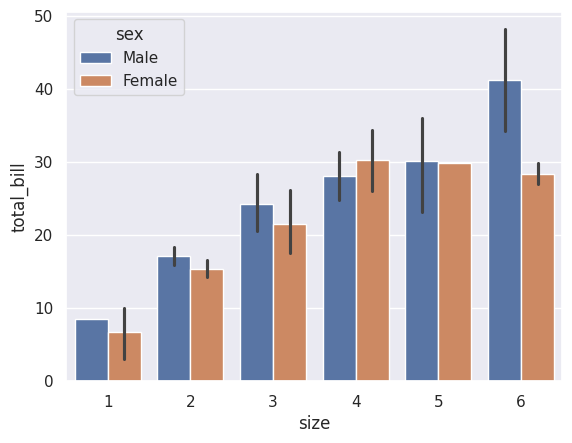

In [ ]:
sns.barplot(data=tips, x="size", y="total_bill", hue="sex")

> Adicione `sns.despine()` depois do gráfico para remover as linhas desnecessárias acima e à direita

 * Execute o código `sns.set_theme()` e depois

In [ ]:
sns.set_theme()

> **Exercício:** Use as funções `plt.xlabel` e `plt.ylabel` para deixar os rótulos dos eixos em português

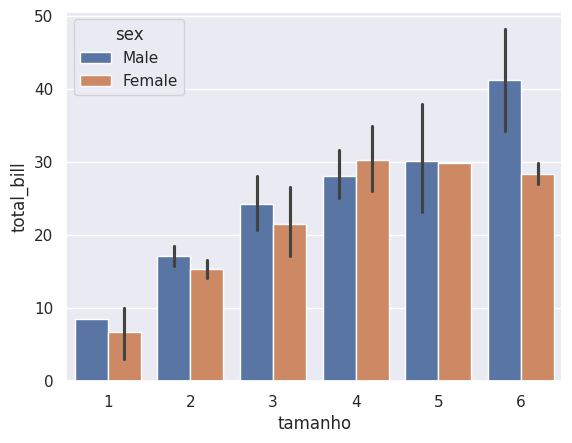

In [ ]:
sns.barplot(data=tips, x="size", y="total_bill", hue="sex")
plt.xlabel("tamanho")
plt.ylabel("gorjeta")
plt.show()

Esse gráfico mostra a incerteza sobre as médias, mas não a _variabilidade_ da coluna `total_bill`. Para visualizar essa variação, use boxplots e violin plots, ou mesmo plotar os dados diretamente.

> **Exercício:** Use as funções `sns.boxplot`, `sns.violinplot` e `sns.catplot` para gerar outras visualizações sobre essas mesmas variáveis.

In [ ]:
sns.boxplot(data=tips, x="size", y="total_bill", hue="sex")

<Axes: xlabel='size', ylabel='total_bill'>

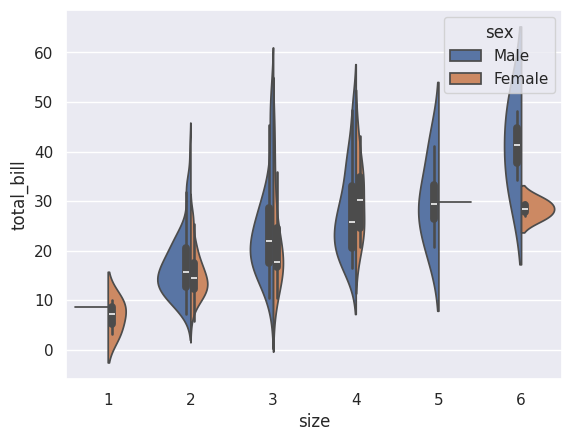

In [ ]:
sns.violinplot(data=tips, x="size", y="total_bill", hue="sex", split=True)

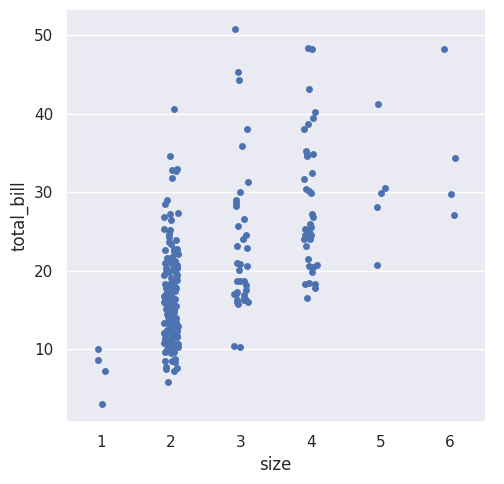

In [ ]:
sns.catplot(data=tips, x="size", y="total_bill")

## Gráficos com variáveis quantitativas

O gráfico mais simples para relacionar variáveis quantitativas é o scatter plot (gráfico de dispersão):

<Axes: xlabel='total_bill', ylabel='tip'>

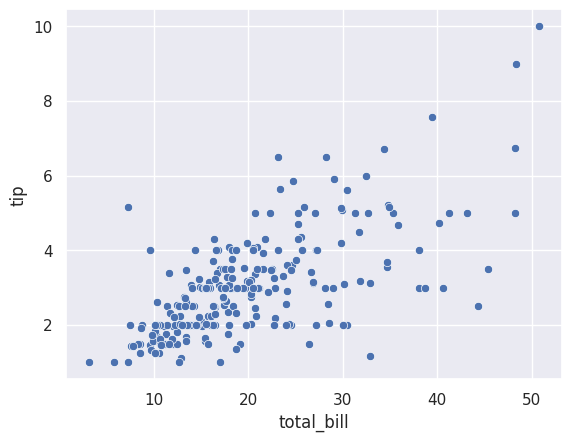

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

> **Exercício:** experimente usar `hue="smoker"` e `style="smoker"` nessa função

<Axes: xlabel='total_bill', ylabel='tip'>

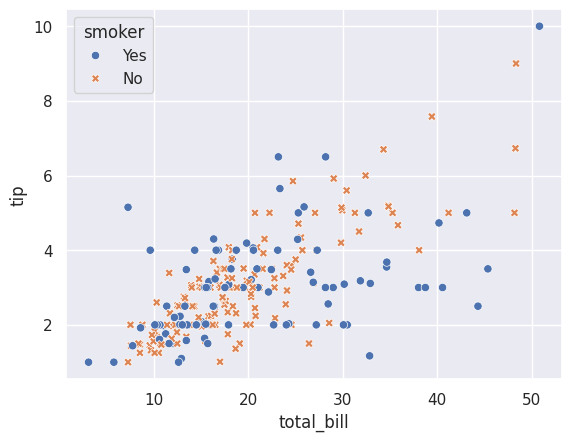

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip",hue="smoker", style="smoker")

> **Exercício:** experimente usar `hue="size"` para ver como o Seaborn lida com hues numéricos

<Axes: xlabel='total_bill', ylabel='tip'>

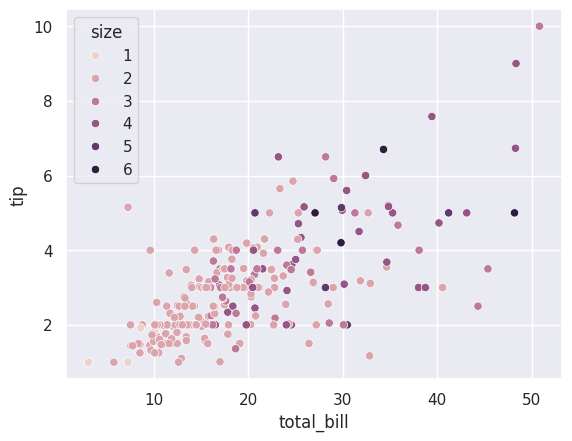

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size")

> **Exercício:** use o parâmetro `size="size"` para ver outra forma de incluir mais uma variável quantitativa no gráfico

<Axes: xlabel='total_bill', ylabel='tip'>

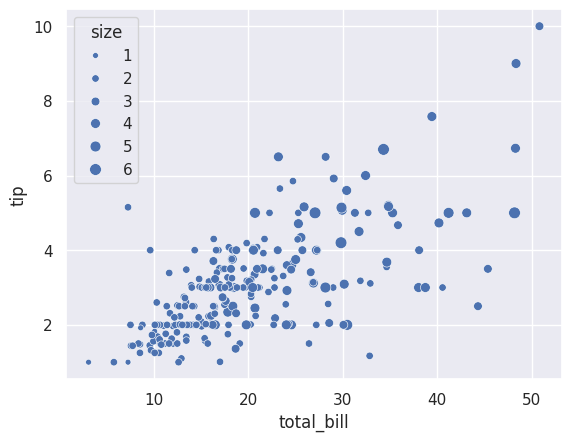

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip", size="size")

Quando uma das variáveis tem uma interpretação temporal, faz sentido usar gráficos de linha. Também podemos fazê-los no Seaborn:

In [ ]:
fmri = sns.load_dataset("fmri")
fmri

In [ ]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")

In [ ]:
sns.lineplot(
    data=fmri.loc[fmri["region"] == 'frontal'],
    x="timepoint",
    y="signal",
    hue="event",
    units="subject",
    estimator=None
  )

## Heatmaps

Heatmaps são gráficos úteis para visualizar associação entre variáveis categóricas:

In [ ]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
tabela_contingencia = pd.crosstab(penguins["species"], penguins["island"])
tabela_contingencia

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


<Axes: xlabel='island', ylabel='species'>

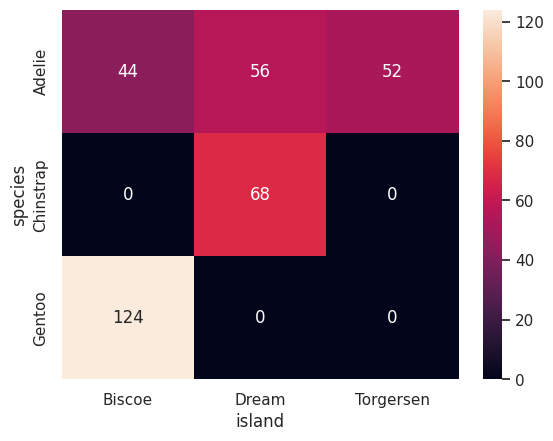

In [ ]:
sns.heatmap(tabela_contingencia, annot=True, fmt="d")

Outro uso comum de heatmaps é para visualizar matrizes de correlação:

In [ ]:
correlation_matrix = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
correlation_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [ ]:
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', figsize=(7,7))

Heatmaps também podem ser usados para associar várias variáveis quantitativas a variáveis categóricas:

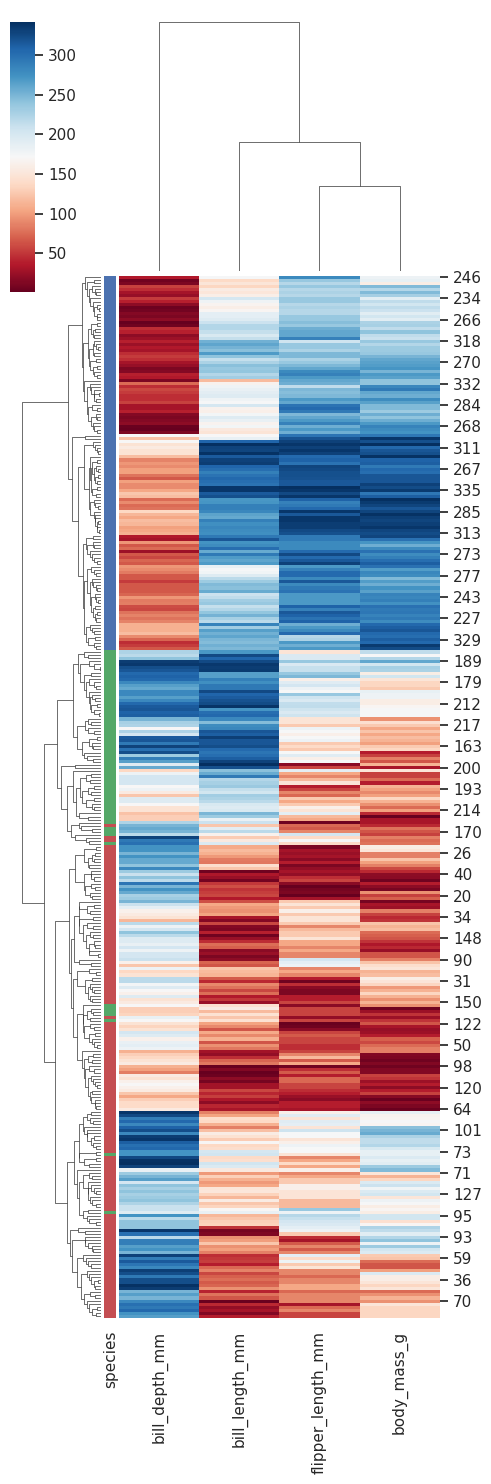

In [ ]:
ranks = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].dropna().rank()
colors = {'Adelie':"r", 'Chinstrap':"g", 'Gentoo':"b"}
sns.clustermap(ranks, row_colors=penguins["species"].map(colors), figsize=(5,15), cmap="RdBu")

## Visualizando distribuições

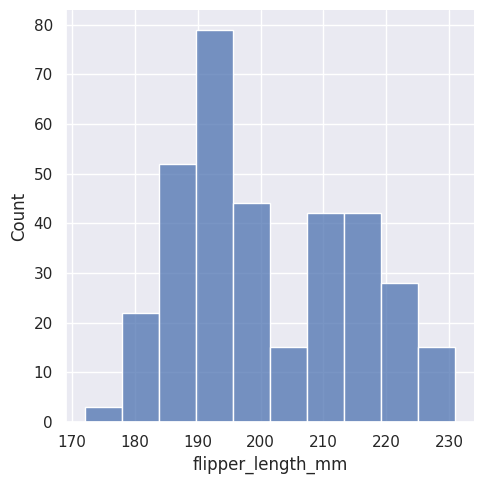

In [ ]:
sns.displot(penguins, x="flipper_length_mm")

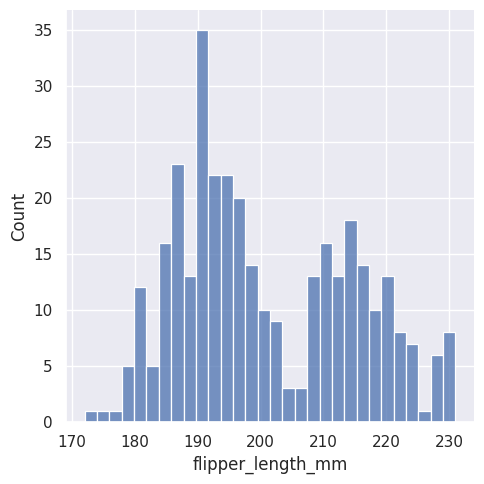

In [ ]:
sns.displot(penguins, x="flipper_length_mm", bins=30)

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="stack")

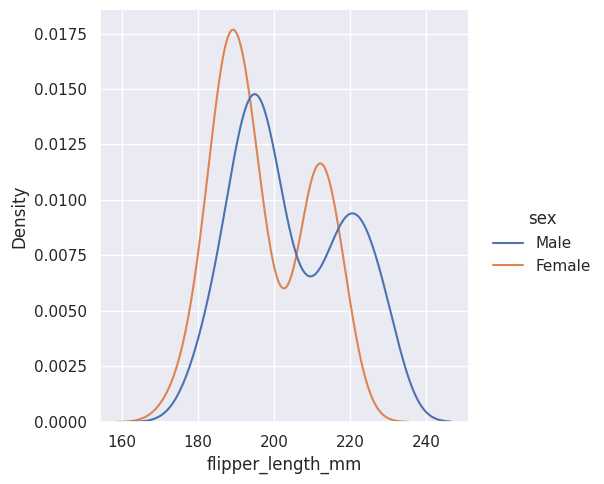

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", kind="kde")

In [ ]:
sns.displot(penguins, x="flipper_length_mm", kde=True)

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [ ]:
sns.pairplot(penguins, hue="species")

## Small multiples

A função FacetGrid do Seaborn permite gerar vários minigráficos para compor uma figura maior (pequenos múltiplos):

In [ ]:
g = sns.FacetGrid(tips, row="time", col="day")

In [ ]:
g = sns.FacetGrid(tips, row="time", col="day")
g.map(sns.histplot, "tip")

> **Exercício:** Gere gráficos de dispersão para gorjeta (tip) e valor da conta (total_bill) para cada dia da semana, no formato de de pequenos múltiplos

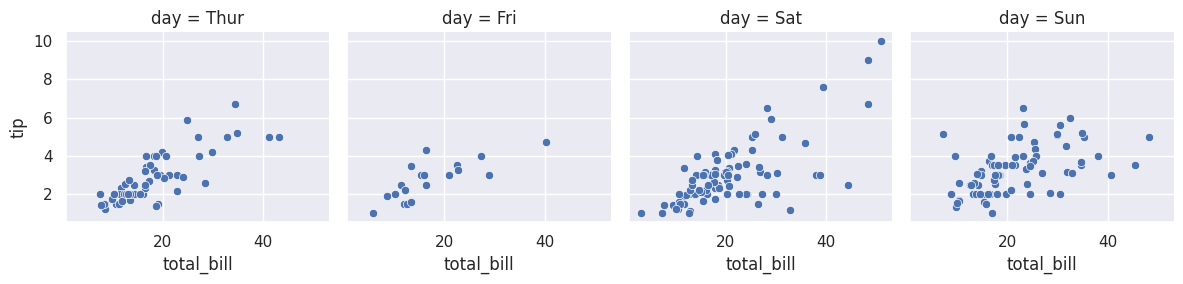

In [ ]:
g = sns.FacetGrid(tips, col="day")

g.map(sns.scatterplot, "total_bill", "tip")

## Long-format e wide-format

In [ ]:
data = {
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Math_Score_1': [90, 85, 76],
    'Math_Score_2': [88, 87, 80],
    'English_Score_1': [78, 82, 90],
    'English_Score_2': [85, 88, 92],
}

wide_df = pd.DataFrame(data)

wide_df

In [ ]:
value_vars = [col for col in wide_df.columns if '_' in col]
long_df = pd.melt(wide_df, id_vars=['ID', 'Name'], var_name='Exam_Subject', value_name='Score')

In [ ]:
long_df

In [ ]:
g = sns.boxplot(long_df, x="Exam_Subject", y="Score")

## Paletas de cores

### Paletas sequenciais

In [ ]:
data = sns.load_dataset("flights")
pivot_data = data.pivot_table(index="month", columns="year", values="passengers")
sns.heatmap(pivot_data, cmap="Blues")

### Paletas divergentes

In [ ]:
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', figsize=(5,5), center=0)

### Paletas qualitativas

In [ ]:
sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", hue="species", palette="colorblind", data=penguins)

In [ ]:
custom_palette = ["#E6C060", "#2E888A", "#B6174B"]
sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", hue="species", palette=custom_palette, data=penguins)

https://seaborn.pydata.org/tutorial/color_palettes.html

# Exercícios

1. **Dataset de pinguins:** Crie um gráfico para visualizar a relação entre tamanho do bico e peso do pinguim. Calcule a correlação entre essas variáveis.

> Essa correlação tem o valor esperado? Temos alguma variável confundidora agindo? Como corrigir?

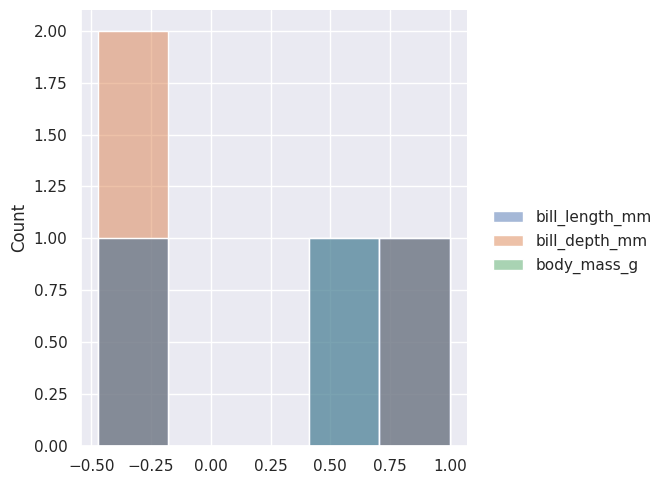

In [ ]:
correlation_matrix = penguins[['bill_length_mm', 'bill_depth_mm', 'body_mass_g']].corr()
sns.displot(correlation_matrix)

2. **Dataset de voos:** Crie um gráfico de linha mostrando a variação do número de voos ao longo dos meses e anos. Sugiro construir uma coluna com informação de data (mês e ano) e pesquisar sobre a função `pd.to_datetime`.

In [ ]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


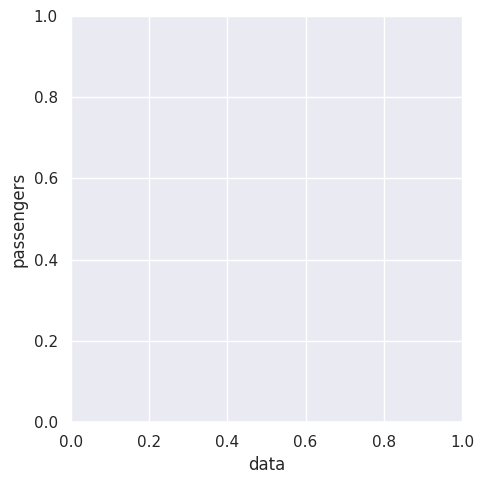

In [ ]:
mesNum = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
flights["month"] = flights["month"].map(mesNum)
flights["data"] = pd.to_datetime(flights[["year","month"]].assign(day=1))

voos = flights.groupby('data').sum().reset_index()

sns.displot(voos, x='data', y='passengers')


3. **Dataset de gorjetas:** Monte um heatmap para mostrar o valor das gorjetas  para almoço e janta em cada dia da semana. Faça isso para o valor absoluto das gorjetas, e depois repita considerando o valor relativo (% em relação ao total da conta)

<Axes: xlabel='time', ylabel='day'>

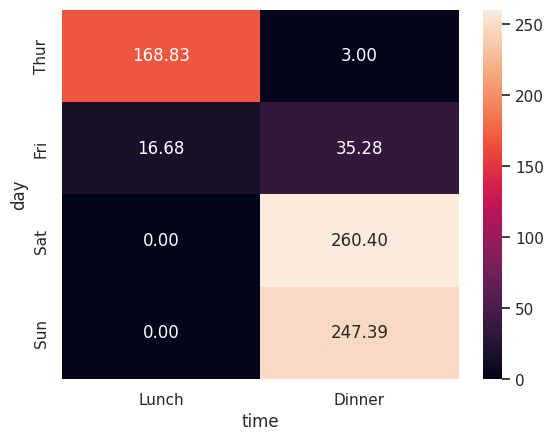

In [ ]:
tips_lunchDinner = tips[(tips["time"] == "Lunch") | (tips["time"] == "Dinner")]
abso_tips = tips_lunchDinner.pivot_table(index="day", columns="time", values="tip", aggfunc="sum")
sns.heatmap(abso_tips, annot=True, fmt=".2f")


4. Utilizando o dataset disponível em https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv, monte um gráfico para mostrar a relação entre preço do item e número de pedidos

In [ ]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
item = pd.read_csv(url, sep='\t')
item


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


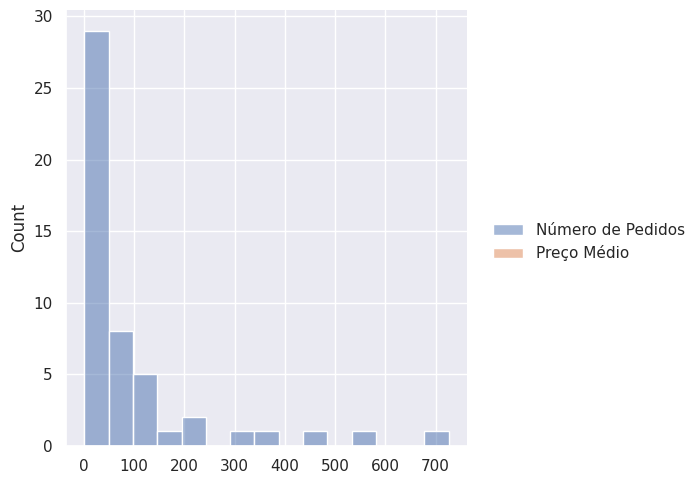

In [ ]:
item_NDuplicado = item.drop_duplicates(subset=['item_name'])

pedidos = item['item_name'].value_counts()

precoMedio = item.groupby(pedidos)['item_price'].mean()

dataFrameItem = pd.DataFrame({'Número de Pedidos': pedidos, 'Preço Médio': precoMedio})


sns.displot(dataFrameItem)

5. No mesmo dataset, monte uma visualização para mostrar quantos pedidos cada items teve, para os top-10 itens.

<Axes: xlabel='item_name', ylabel='count'>

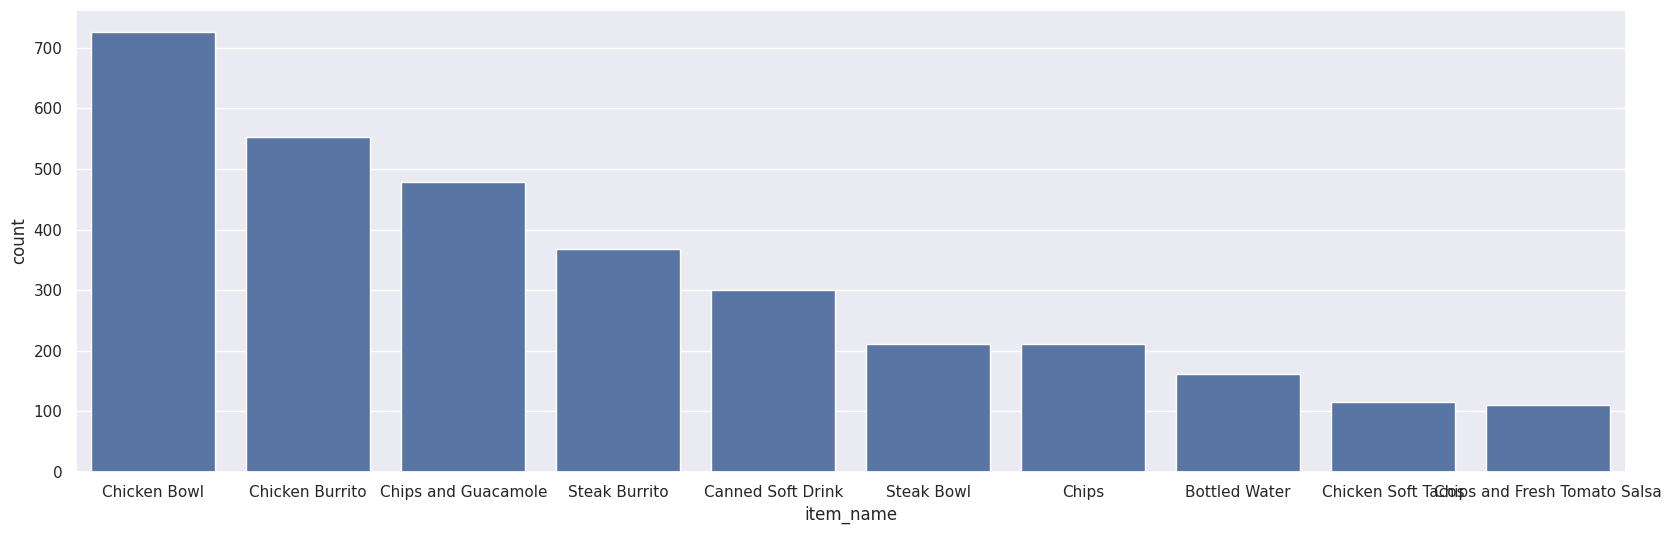

In [ ]:
pedidos = item['item_name'].value_counts()
top10P = pedidos.head(10)
plt.figure(figsize=(20, 6))
sns.barplot(top10P)